In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

In [2]:
category_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'absences', 'famrel', 'freetime',
                    'goout', 'Dalc', 'Walc', 'health']
grade = ['G1', 'G2']
final_grade = 'G3'

In [3]:
data_df = pd.read_csv('./data/student-mat.csv')
# convert category feature to numeric feature
for column_name in category_features:
    data_df[column_name] = data_df[column_name].astype('category').cat.codes

# Decision Tree

## Binary Classification

pass    265
fail    130
Name: PassOrFail, dtype: int64


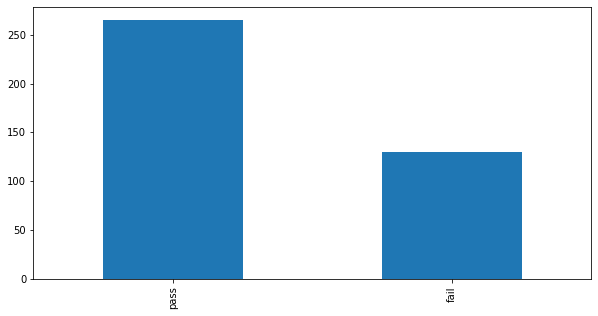

In [4]:
# binary classification label
data_df['PassOrFail'] = data_df['G3'].map(lambda x: "pass" if x >= 10 else "fail")
print(data_df['PassOrFail'].value_counts())
data_df['PassOrFail'].value_counts().plot(kind='bar', figsize=(10,5))

In [5]:
# split data to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data_df[category_features + numeric_features + grade].values,
                                                    data_df['PassOrFail'].astype('category').cat.codes,
                                                    test_size=0.3,
                                                    random_state=2)
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
confusion_matrix(Y_test, Y_pred)
print("Accurancy score: {}".format(accuracy_score(Y_test, Y_pred)))

Accurancy score: 0.8739495798319328


[Text(184.14000000000001, 207.55636363636364, 'X[31] <= 9.5\ngini = 0.442\nsamples = 276\nvalue = [91, 185]'),
 Text(100.44000000000001, 187.7890909090909, 'X[31] <= 7.5\ngini = 0.257\nsamples = 99\nvalue = [84, 15]'),
 Text(83.70000000000002, 168.0218181818182, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(117.18, 168.0218181818182, 'X[30] <= 7.5\ngini = 0.411\nsamples = 52\nvalue = [37, 15]'),
 Text(100.44000000000001, 148.25454545454545, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(133.92000000000002, 148.25454545454545, 'X[29] <= 4.5\ngini = 0.464\nsamples = 41\nvalue = [26, 15]'),
 Text(100.44000000000001, 128.48727272727274, 'X[16] <= 0.5\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(83.70000000000002, 108.72, 'X[18] <= 3.5\ngini = 0.472\nsamples = 21\nvalue = [13, 8]'),
 Text(66.96000000000001, 88.95272727272729, 'X[7] <= 0.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(33.480000000000004, 69.18545454545455, 'X[8] <= 0.5\ngini = 0.346\nsamples = 9\nval

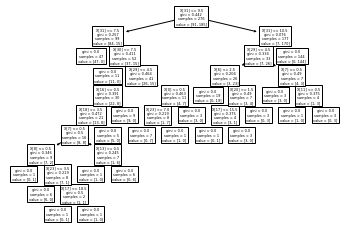

In [6]:
tree.plot_tree(decision_tree)

## Five-Level Classification

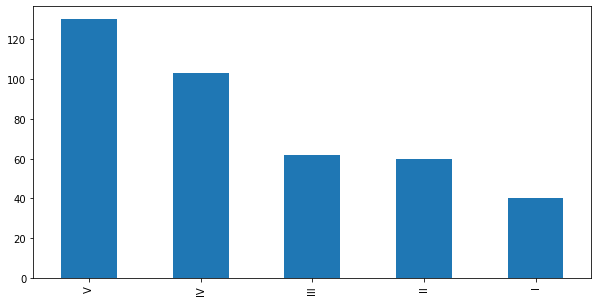

In [7]:
# five-level classification label
def grade_level(x):
    if 16 <= x <= 20:
        return "I"
    elif 14 <= x <=15:
        return "II"
    elif 12 <= x <= 13:
        return "III"
    elif 10 <= x <= 11:
        return "IV"
    else:
        return "V"
data_df['GradeLevel'] = data_df['G3'].map(grade_level)
data_df['GradeLevel'].value_counts().plot(kind='bar', figsize=(10, 5))

In [8]:
# split data to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data_df[category_features + numeric_features + grade].values,
                                                    data_df['GradeLevel'].astype('category').cat.codes,
                                                    test_size=0.3,
                                                    random_state=2)
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[ 6,  4,  1,  0,  0],
       [ 3,  8,  2,  0,  0],
       [ 0,  4,  9,  6,  0],
       [ 0,  1, 10, 14, 12],
       [ 0,  0,  0,  4, 35]])

In [ ]:
tree.plot_tree(decision_tree)

[Text(122.80573770491803, 209.07692307692307, 'X[31] <= 9.5\ngini = 0.77\nsamples = 276\nvalue = [29, 47, 43, 66, 91]'),
 Text(32.93114754098361, 192.35076923076923, 'X[31] <= 7.5\ngini = 0.257\nsamples = 99\nvalue = [0, 0, 0, 15, 84]'),
 Text(27.442622950819672, 175.62461538461537, 'gini = 0.0\nsamples = 47\nvalue = [0, 0, 0, 0, 47]'),
 Text(38.41967213114754, 175.62461538461537, 'X[30] <= 7.5\ngini = 0.411\nsamples = 52\nvalue = [0, 0, 0, 15, 37]'),
 Text(32.93114754098361, 158.89846153846153, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 11]'),
 Text(43.90819672131148, 158.89846153846153, 'X[29] <= 4.5\ngini = 0.464\nsamples = 41\nvalue = [0, 0, 0, 15, 26]'),
 Text(32.93114754098361, 142.1723076923077, 'X[16] <= 0.5\ngini = 0.391\nsamples = 30\nvalue = [0, 0, 0, 8, 22]'),
 Text(27.442622950819672, 125.44615384615385, 'X[18] <= 3.5\ngini = 0.472\nsamples = 21\nvalue = [0, 0, 0, 8, 13]'),
 Text(21.95409836065574, 108.72, 'X[7] <= 0.5\ngini = 0.5\nsamples = 16\nvalue = [0, 0, 0, 8, 8

# Using Different Attributes Set

## Attribute Set A

In [ ]:
# split data to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data_df[category_features + numeric_features + ["G1", "G2"]].values,
                                                    data_df['GradeLevel'].astype('category').cat.codes,
                                                    test_size=0.3,
                                                    random_state=2)
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
confusion_matrix(Y_test, Y_pred)

## Attribute Set B

In [ ]:
# split data to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data_df[category_features + numeric_features + ["G1"]].values,
                                                    data_df['GradeLevel'].astype('category').cat.codes,
                                                    test_size=0.3,
                                                    random_state=2)
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
confusion_matrix(Y_test, Y_pred)

## Attribute Set C

In [ ]:
# split data to train and test data
X_train, X_test, Y_train, Y_test = train_test_split(data_df[category_features + numeric_features].values,
                                                    data_df['GradeLevel'].astype('category').cat.codes,
                                                    test_size=0.3,
                                                    random_state=2)
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
confusion_matrix(Y_test, Y_pred)